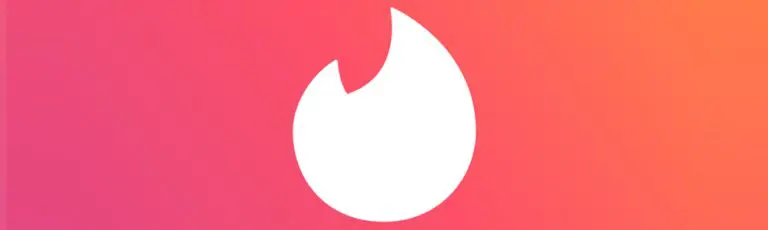

# Import

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go


In [85]:
dataset = pd.read_csv("src/Speed+Dating+Data.csv", encoding='cp1252')
dataset

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# Etude du dataset

In [86]:
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [ ]:
dataset.describe

In [101]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Femmes,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Femmes,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Femmes,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Femmes,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Femmes,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Value_count de differents parametres

In [87]:
counts_gender = dataset['gender'].value_counts()
counts_gender

gender
1    4194
0    4184
Name: count, dtype: int64

In [88]:
counts_age =dataset['age'].value_counts()
counts_age

age
27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: count, dtype: int64

In [89]:
counts_field =dataset['field'].value_counts()
counts_field 

field
Business                          521
MBA                               468
Law                               462
Social Work                       378
International Affairs             252
                                 ... 
Business (Finance & Marketing)      6
Stats                               6
MFA  Poetry                         6
marine geophysics                   5
theory                              5
Name: count, Length: 259, dtype: int64

# Etude du genre

In [ ]:
# Remplacement des int en str
gender = dataset['gender'].apply(lambda x: 
                               "Femme" if x == 0 
                               else "Homme" if x == 1
                               else "NAN")

print(gender)

In [90]:
dataset['gender'] = dataset['gender'].map({1: 'Hommes', 0: 'Femmes'})
fig = px.pie(dataset, names='gender', title='Répartition par genre',labels={'gender': 'Genre'},)  
fig.show()


# Etude du field en fonction de l'age

In [92]:
etude = dataset['field_cd'].apply(lambda x: 
                               "Law" if x == 1
                               else "Math" if x == 2
                               else "Social Science, Psychologist" if x == 3
                               else "Medical Science, Pharmaceuticals, and Bio Tech " if x == 4
                               else "Engineering" if x == 5 
                               else "English/Creative Writing/ Journalism" if x == 6
                               else "History/Religion/Philosophy" if x == 7 
                               else "Business/Econ/Finance" if x == 8 
                               else "Education, Academia" if x == 9 
                               else "Biological Sciences/Chemistry/Physics" if x == 10 
                               else "Social Work" if x == 11
                               else "Undergrad/undecided" if x == 12
                               else "Political Science/International Affairs" if x == 13
                               else "Film" if x == 14
                               else "Fine Arts/Arts Administration" if x == 15
                               else "Languages" if x == 16
                               else "Architecture" if x == 17
                               else "Other" if x == 18
                               else "NAN")

In [93]:
age = dataset["age"]

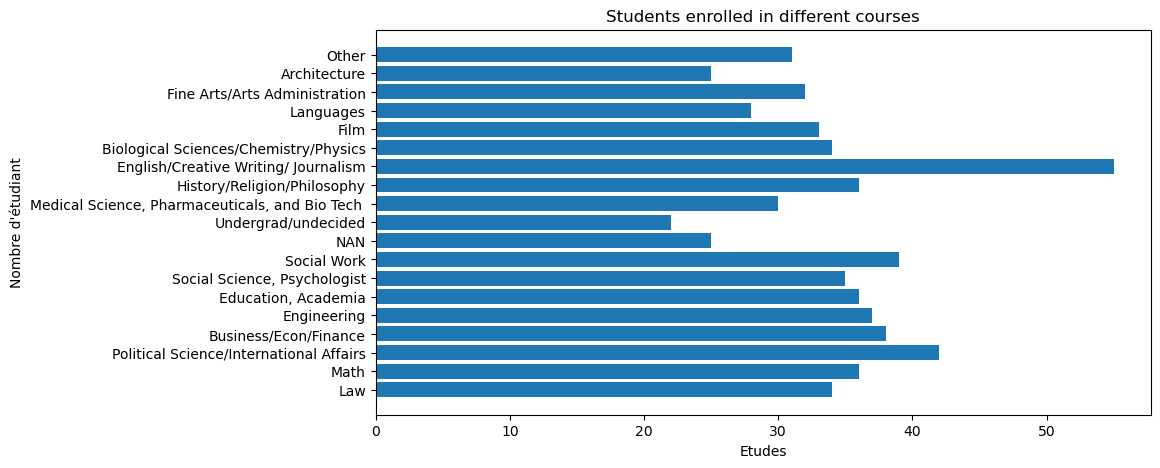

In [95]:
fig = plt.figure(figsize=(10, 5))
plt.barh(etude, age) 
plt.xlabel("Etudes")
plt.ylabel("Nombre d'étudiant")
plt.title("Students enrolled in different courses")
plt.show()

# Etude du nombre de match

In [97]:
dataset['match'].value_counts()

match
0    6998
1    1380
Name: count, dtype: int64

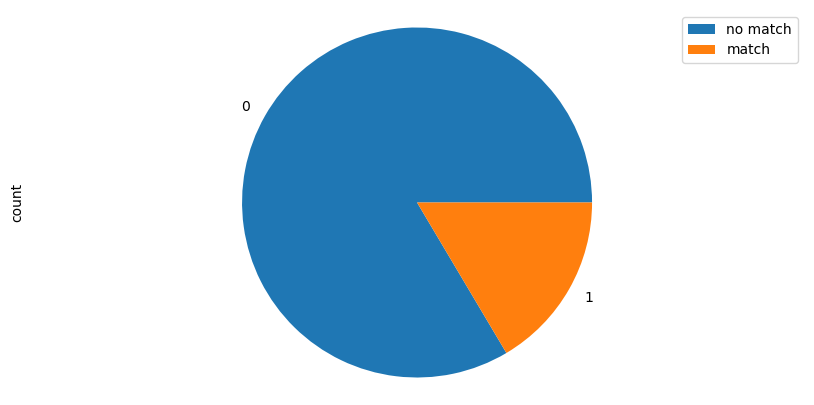

In [98]:
plt.figure(figsize = (10,5))
dataset['match'].value_counts().plot.pie()
plt.axis('equal')
plt.legend(['no match', 'match'])

plt.show()

In [124]:
dataset.dec_o.unique()

array([0, 1], dtype=int64)

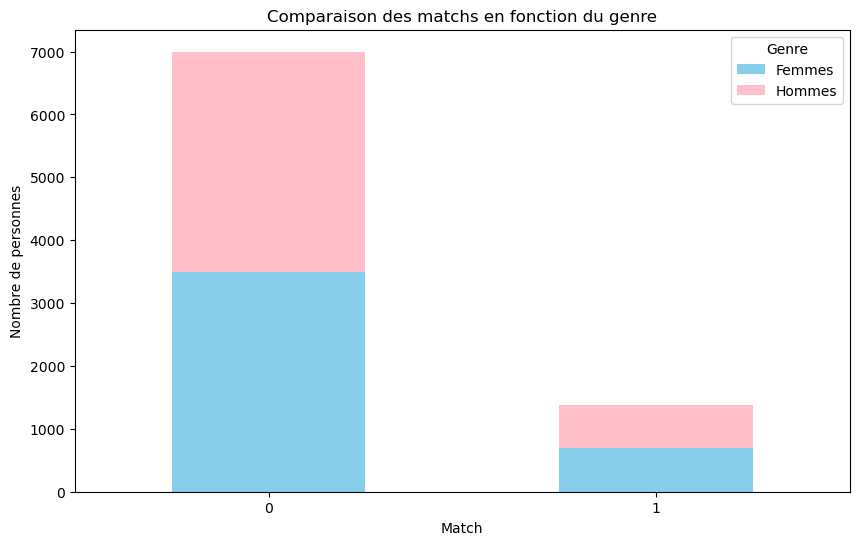

In [144]:
#Compter les occurrences de matchs par genre
match_gender_counts = dataset.groupby(['match', 'gender']).size().unstack()

#Créer un graphique en barres empilées
match_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'pink'])

#Ajouter des étiquettes et un titre
plt.xlabel('Match')
plt.ylabel('Nombre de personnes')
plt.title('Comparaison des matchs en fonction du genre')
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe x

#Afficher la légende
plt.legend(title='Genre', loc='upper right')

#Afficher le graphique
plt.show()


# etude de la decision du partenaire en fonction du genre

In [139]:
 decision= dataset['dec_o'].apply(lambda x: 
                               "no" if x == 0 
                               else "yes" if x == 1
                               else "NAN")

In [140]:
decisions_by_gender = dataset.groupby(['gender', 'dec_o']).size().unstack()


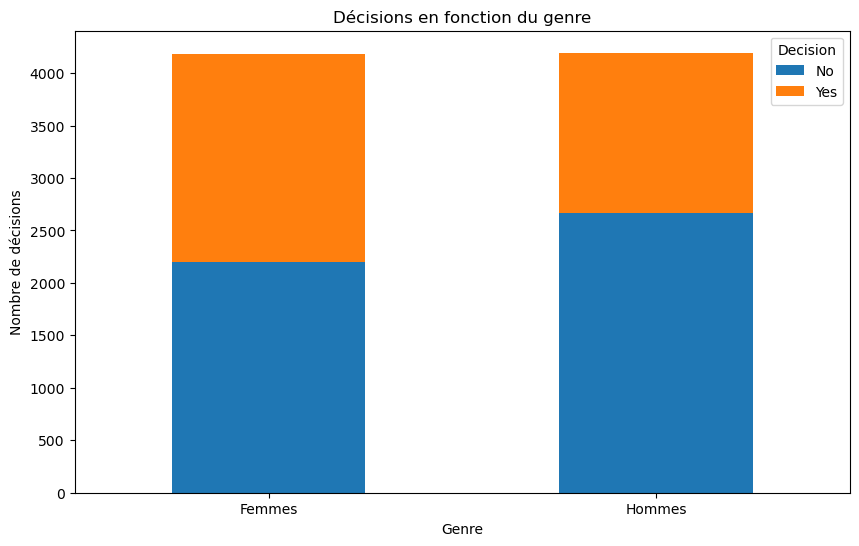

In [141]:
decisions_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Décisions en fonction du genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de décisions')
plt.xticks(rotation=0)
plt.legend(title='Decision', labels=['No', 'Yes'])
plt.show()

# Etude sur la "race" ( origine)des participants

In [115]:
# verif valeurs nulles
race_nul = dataset['race'].isnull().sum()
print("Nombre de valeurs manquantes dans la colonne 'race':", race_nul)

Nombre de valeurs manquantes dans la colonne 'race': 63


In [ ]:
#enleve valeurs nulles
race = dataset.dropna(subset=['race'])
race.value_counts

In [117]:
# etude sur l'origine des participants
counts_field =race['race'].value_counts()
counts_field.value_counts

<bound method IndexOpsMixin.value_counts of race
2.0    4727
4.0    1982
3.0     664
6.0     522
1.0     420
Name: count, dtype: int64>